In [40]:
library(randomForest)
library(partykit)
library(rpart)
library(mobForest)
library(e1071)

Loading required package: parallel
Loading required package: party
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich

Attaching package: ‘party’

The following objects are masked from ‘package:partykit’:

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal, varimp



# Méthodes de machine learning

In [2]:
data_tot = read.csv('./Donnees/Plusieurs_pays/Total.csv', header = TRUE)
data_tot = data_tot[-c(47,60)]

Création d'un nouveau dataframe sans les variables `Rating` et `Pays`, utilisé après :

In [3]:
#data = data_tot[,-c(81,82,83,84)]
data = data_tot[,-c(34:46,81,82,83,84)]

## Random Forest

#### Sur la variable Rating

Ici on cherche à faire de la prédiction sur la variable `Rating`.

In [4]:
foot.rf = randomForest(data_tot$Rating ~ ., data=data)

In [5]:
print(foot.rf)


Call:
 randomForest(formula = data_tot$Rating ~ ., data = data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 22

          Mean of squared residuals: 0.004524509
                    % Var explained: 69.84


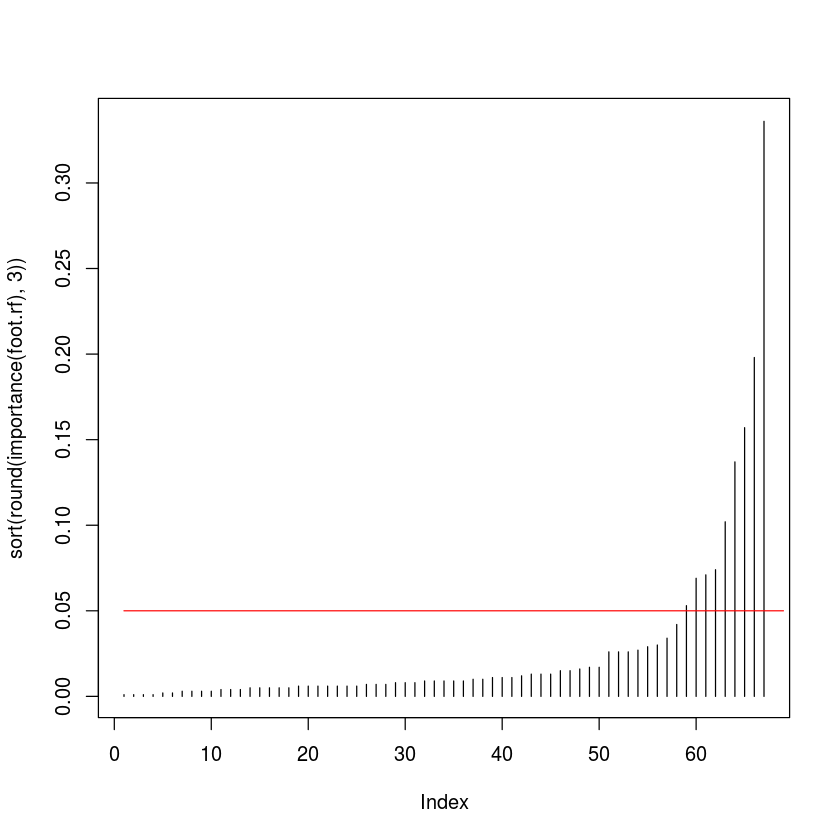

In [6]:
classement_variables = order(round(importance(foot.rf), 3))
plot(sort(round(importance(foot.rf), 3)), type = 'h')
lines(seq(1,70,2),rep(0.05,35), col = 2)

A la vue de ce graphique, on peut se fixer de ne garder que les variables pour lesquelles l'importance est supérieure à $0.05$. Il en reste alors 9.

In [7]:
df.rf = data.frame(matrix(round(importance(foot.rf)[importance(foot.rf)>0.05], 3)))
rownames(df.rf) = rownames(importance(foot.rf))[(importance(foot.rf)>0.05)]

In [8]:
df.rf

,matrix.round.importance.foot.rf..importance.foot.rf....0.05...
,<dbl>
Shots_Total,0.102
ShotsZones_PenaltyArea,0.071
ShotsAccuracy_OnTarget,0.336
Assists_Other,0.069
Assists_Total,0.157
PassesLength_Total,0.074
KeyPassesLength_Total,0.137
KeyPassesLength_Short,0.198
KeyPassesType_Other,0.053


Les variables les plus explicatives du `Rating`, d'après RandomForest, sont les variables ci-dessus.  
On remarque que `Assists_Total` et `Assists_Other` sont présentes dans cette liste. Chaque passe décisive entraîne un but donc c'est sûrement pour ça : même si on a supprimé les variables buts, on n'a pas supprimé les passes décisives qui sont directement corrélées aux buts.  
Une équipe qui fait beaucoup de passes possède beaucoup le ballon et a donc des opportunités de marquer des buts. Cela reflète aussi la construction du jeu entre les joueurs (pas ou peu de duels aériens).

#### Random Forest sur la variable Points

In [9]:
data_but = data_tot[,-c(34:46,81,82,83,84)]
data_but_tot = data_but * data_tot$Nombre
points.classe = factor(as.factor(data_tot$Points), levels=seq(1, 100))

In [10]:
points.classe

[1] 91 75 72 66 61 59 56 55 53 52 49 48 46 41 38 38 36 34 33 27 90 79 69 69 68
 [26] 66 63 59 53 44 43 43 42 41 41 41 38 38 25 17 78 76 66 58 55 55 54 53 51 44
 [51] 43 43 36 33 32 28 21 19 87 76 68 61 59 59 53 53 50 50 50 47 45 44 44 41 41
 [76] 37 33 32 98 97 72 71 70 66 57 54 52 52 50 49 45 45 40 39 36 34 26 16 57 53
[101] 51 45 42 40 38 36 36 35 34 33 33 32 29 29 29 29 26 26 25 24 23 23 23 22
100 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 100

In [65]:
#points.rf = randomForest(as.factor(data_tot$Points) ~ ., data=data_but_tot)
points.rf = randomForest(data_tot$Points ~ ., data=data_but_tot)

In [66]:
print(points.rf)


Call:
 randomForest(formula = data_tot$Points ~ ., data = data_but_tot) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 22

          Mean of squared residuals: 80.60328
                    % Var explained: 73.25


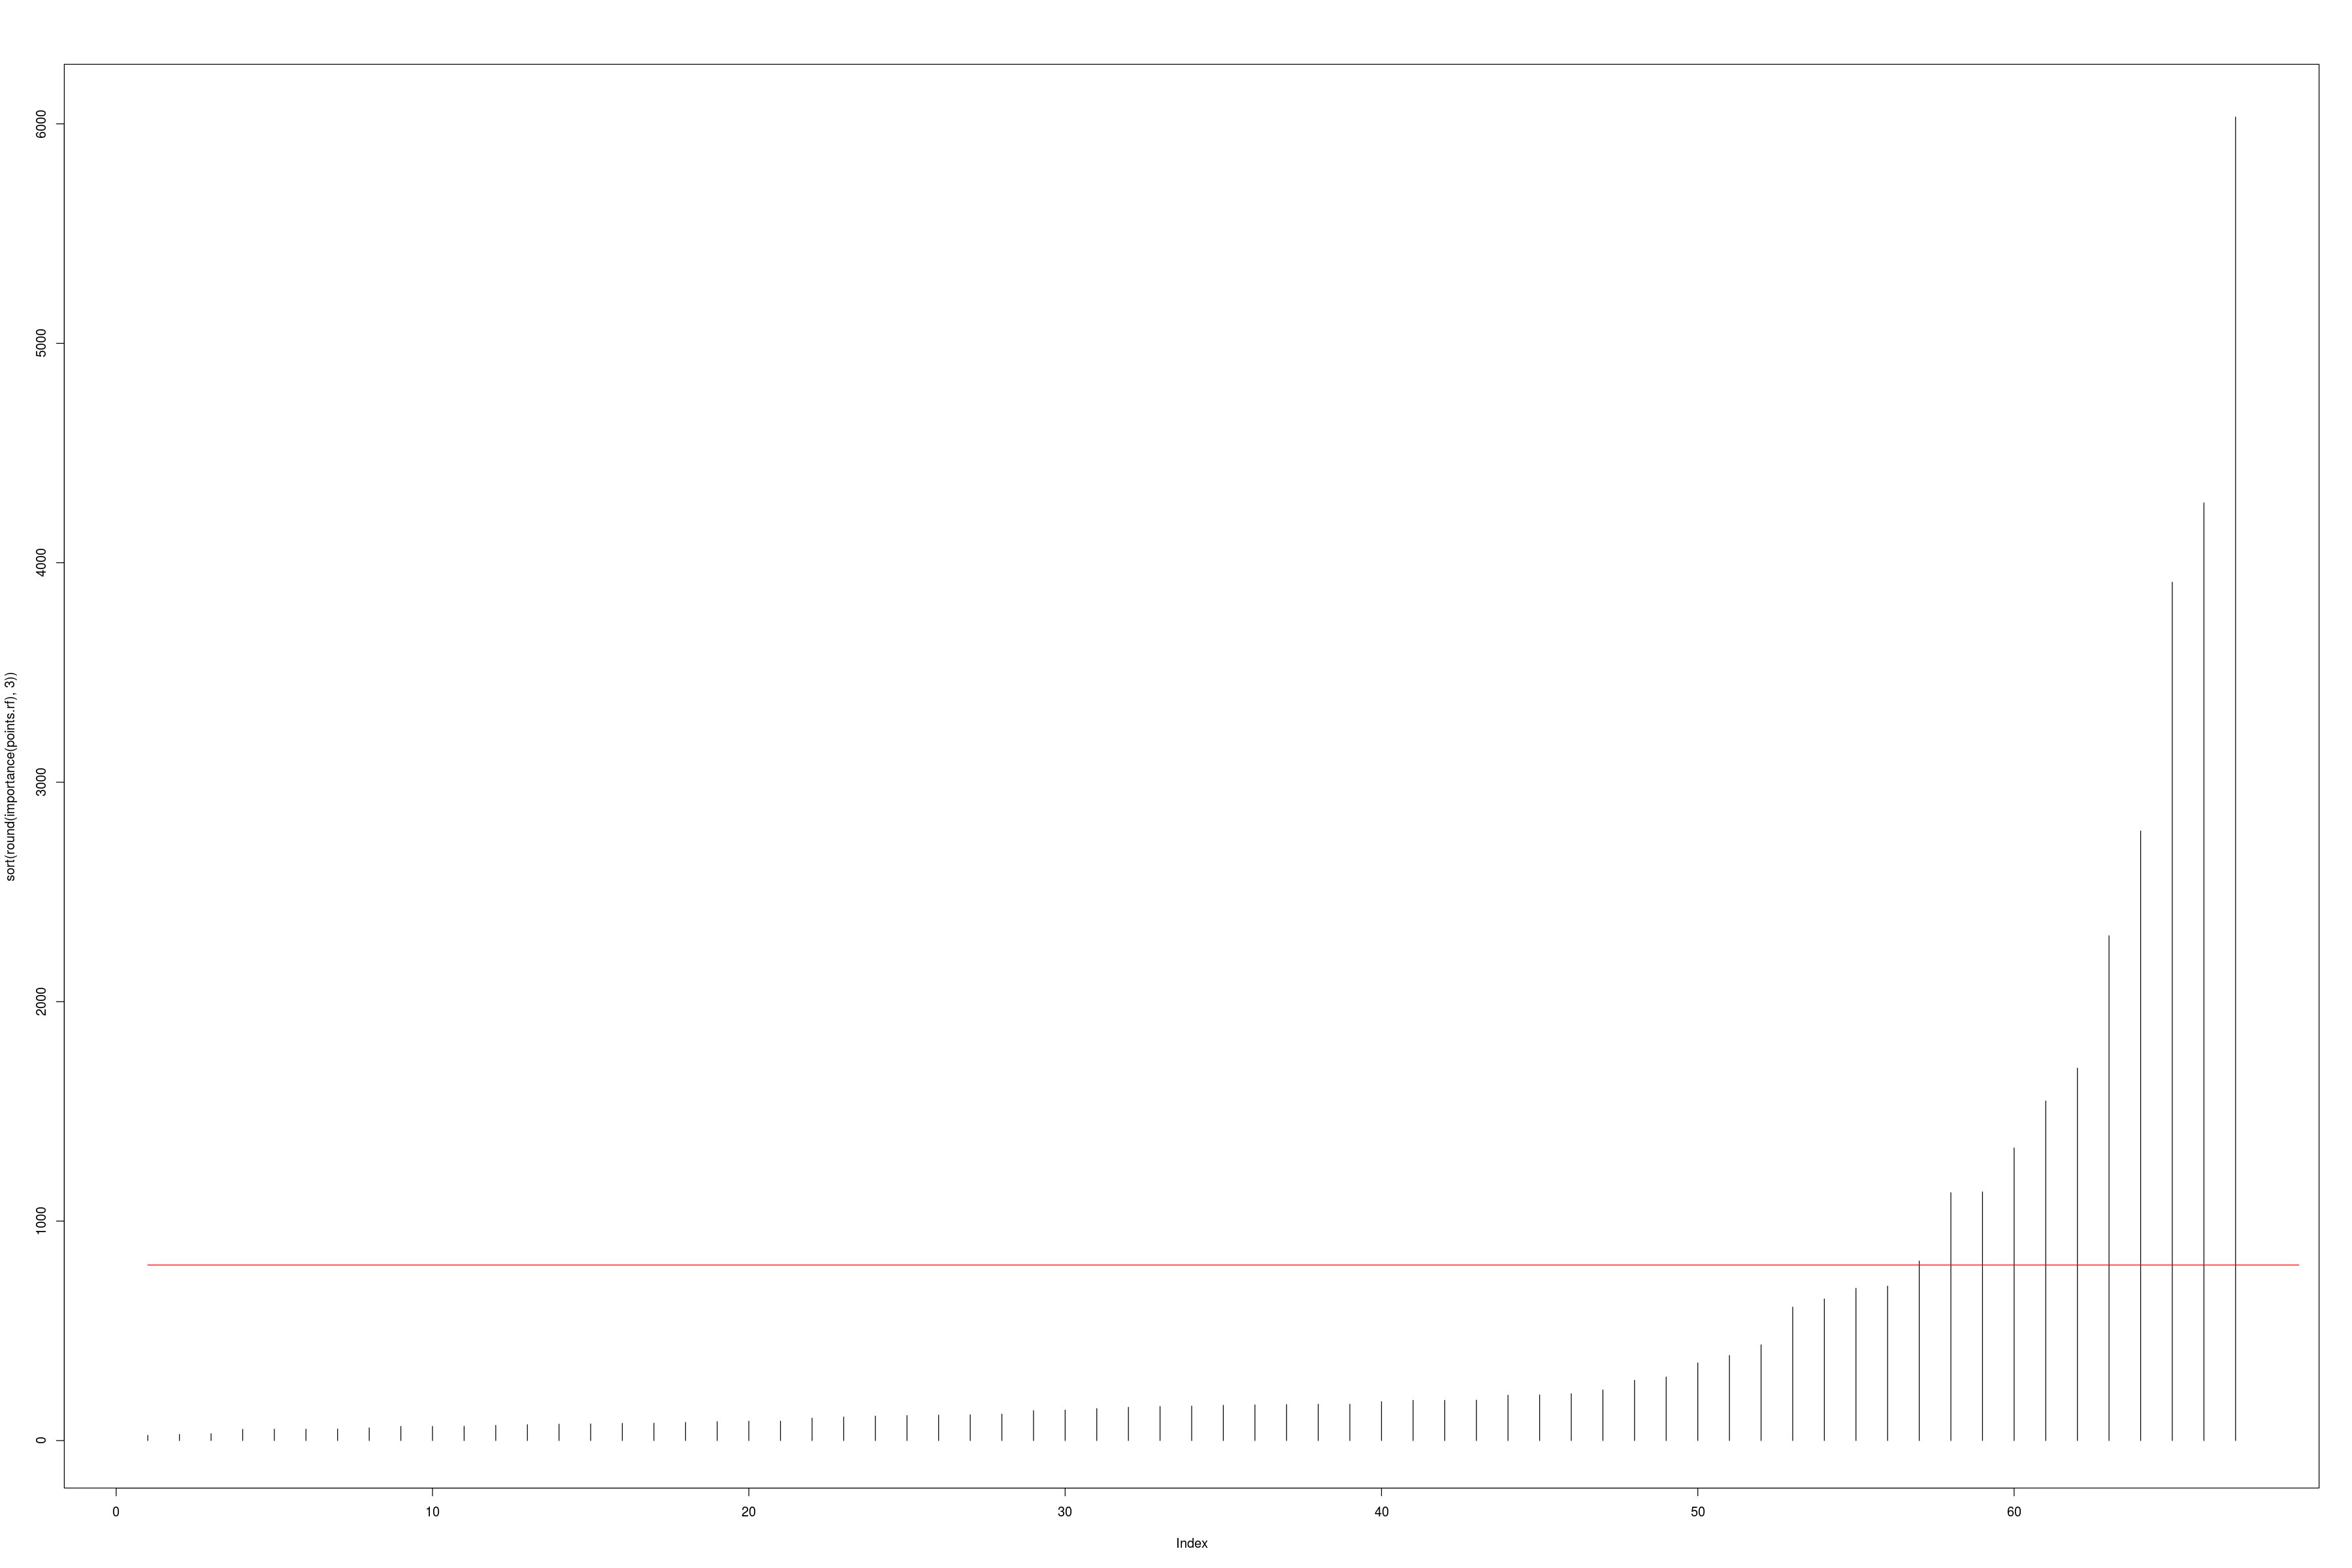

In [67]:
classement_variables_points = order(round(importance(points.rf), 3))
plot(sort(round(importance(points.rf), 3)), type = 'h')
lines(seq(1,70,2),rep(800,35), col = 2)

Ici on compte 10 variables importantes d'après RandomForest pour expliquer `Points`.

In [68]:
df.points.rf = data.frame(matrix(round(importance(points.rf)[importance(points.rf)>1.4], 3)))
rownames(df.points.rf) = rownames(importance(points.rf))[(importance(points.rf)>1.4)]

In [69]:
df.points.rf

,matrix.round.importance.points.rf..importance.points.rf....1.4...
,<dbl>
Tackles_TotalTackles,206.675
Tackles_DribbledPast,113.920
Tackles_TotalAttemptedTackles,177.508
Interception_Total,117.429
Fouls_Fouled,160.826
Fouls_Fouls,184.090
Cards_Yellow,136.543
Cards_Red,52.523
OffSides_CaughtOffside,151.681


Ici on retrouve encore une fois des passes clés, des passes décisives, et les tirs pour expliquer la variable `Points`. On retrouve aussi les passes courtes et la longueur totale des passes, qui témoignent d'une construction du jeu.

## Extraction d'un arbre de la forêt 

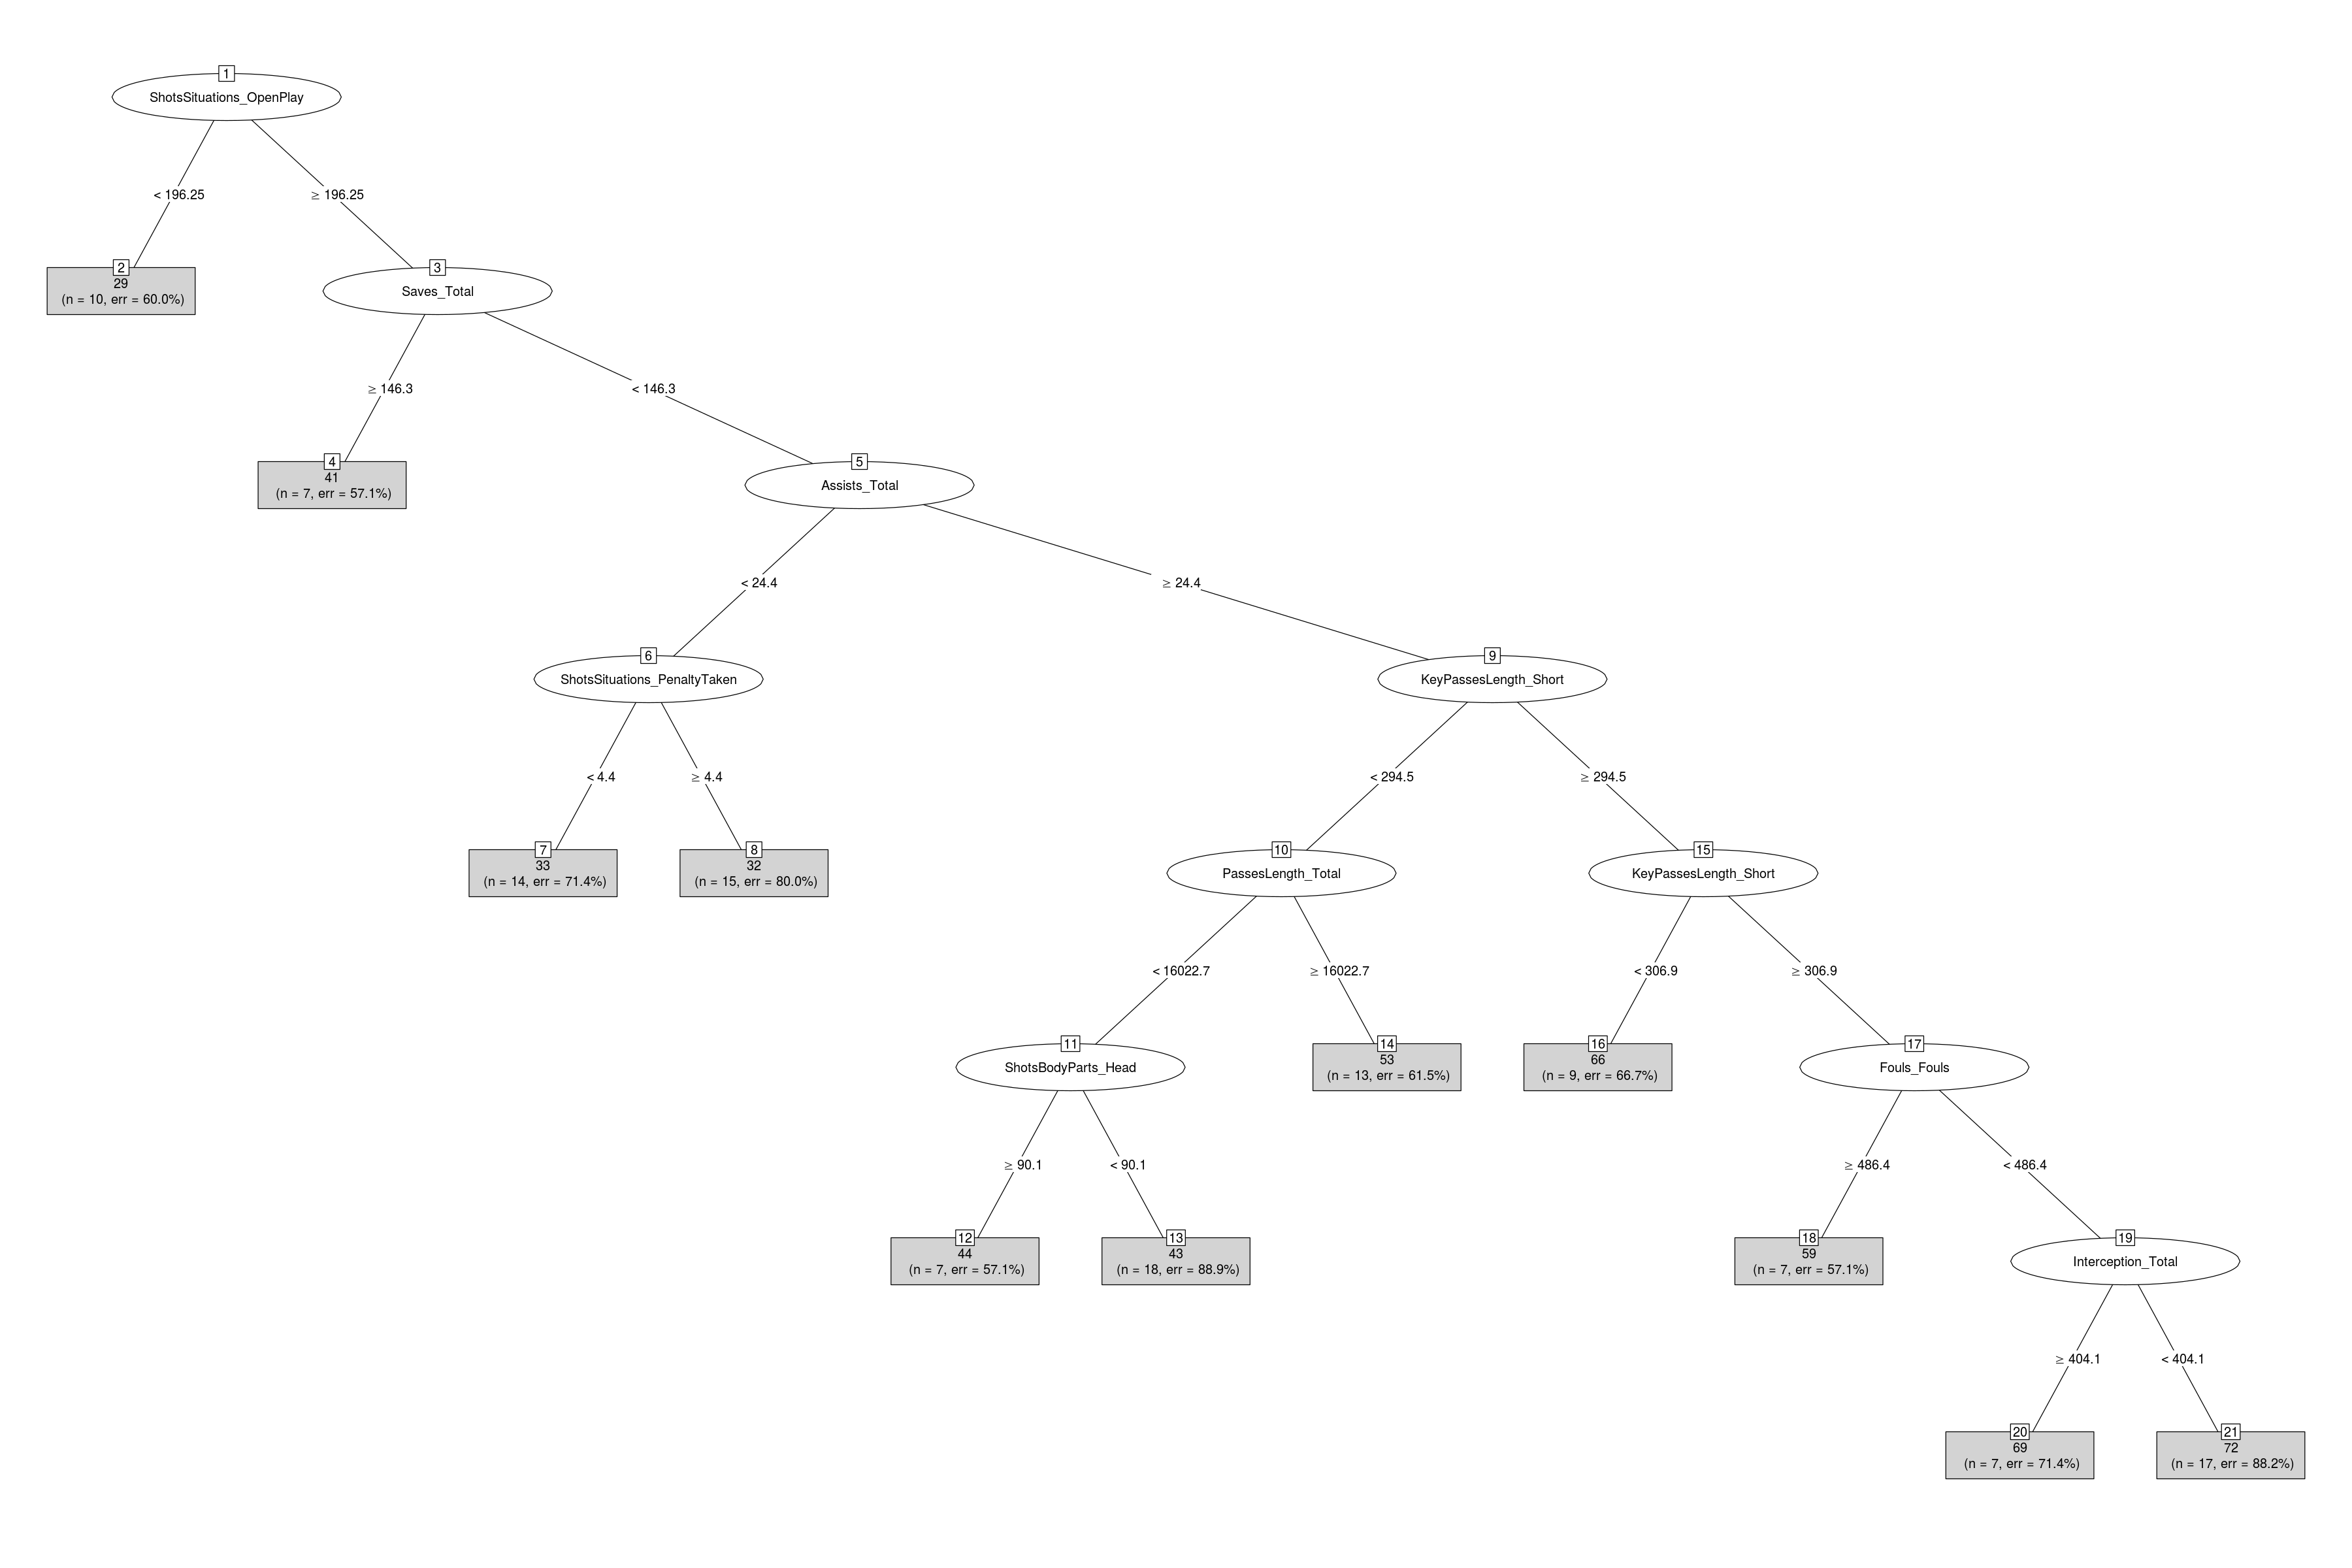

In [16]:
tree.points = rpart(points.classe ~ ., data=data_but_tot, control=rpart.control(cp=0.0001))
        # le parametre cp permet de contrôler l'élagage de l'arbre

options(repr.plot.width=30, repr.plot.height=20)
plot(as.party(tree.points), type="simple")

Ici on remarque sur un arbre que la variable `ShotsSituations_OpenPlay`, qui est la plus importante parmi les 11 retenues ci-dessus, est la première à être utilisée dans cet arbre binaire : c'est le premier noeud de l'arbre. Ensuite, c'est la variable `Saves_Total`.  
Pour le paramètre `cp`, en dessous de 0.001 on ne voit plus la différence dans l'élagage de l'arbre.

## Prediction

#### Sur la variable `Rating`

In [17]:
predict.rating = predict(foot.rf, data)

In [18]:
residus.rating = data_tot$Rating - predict.rating

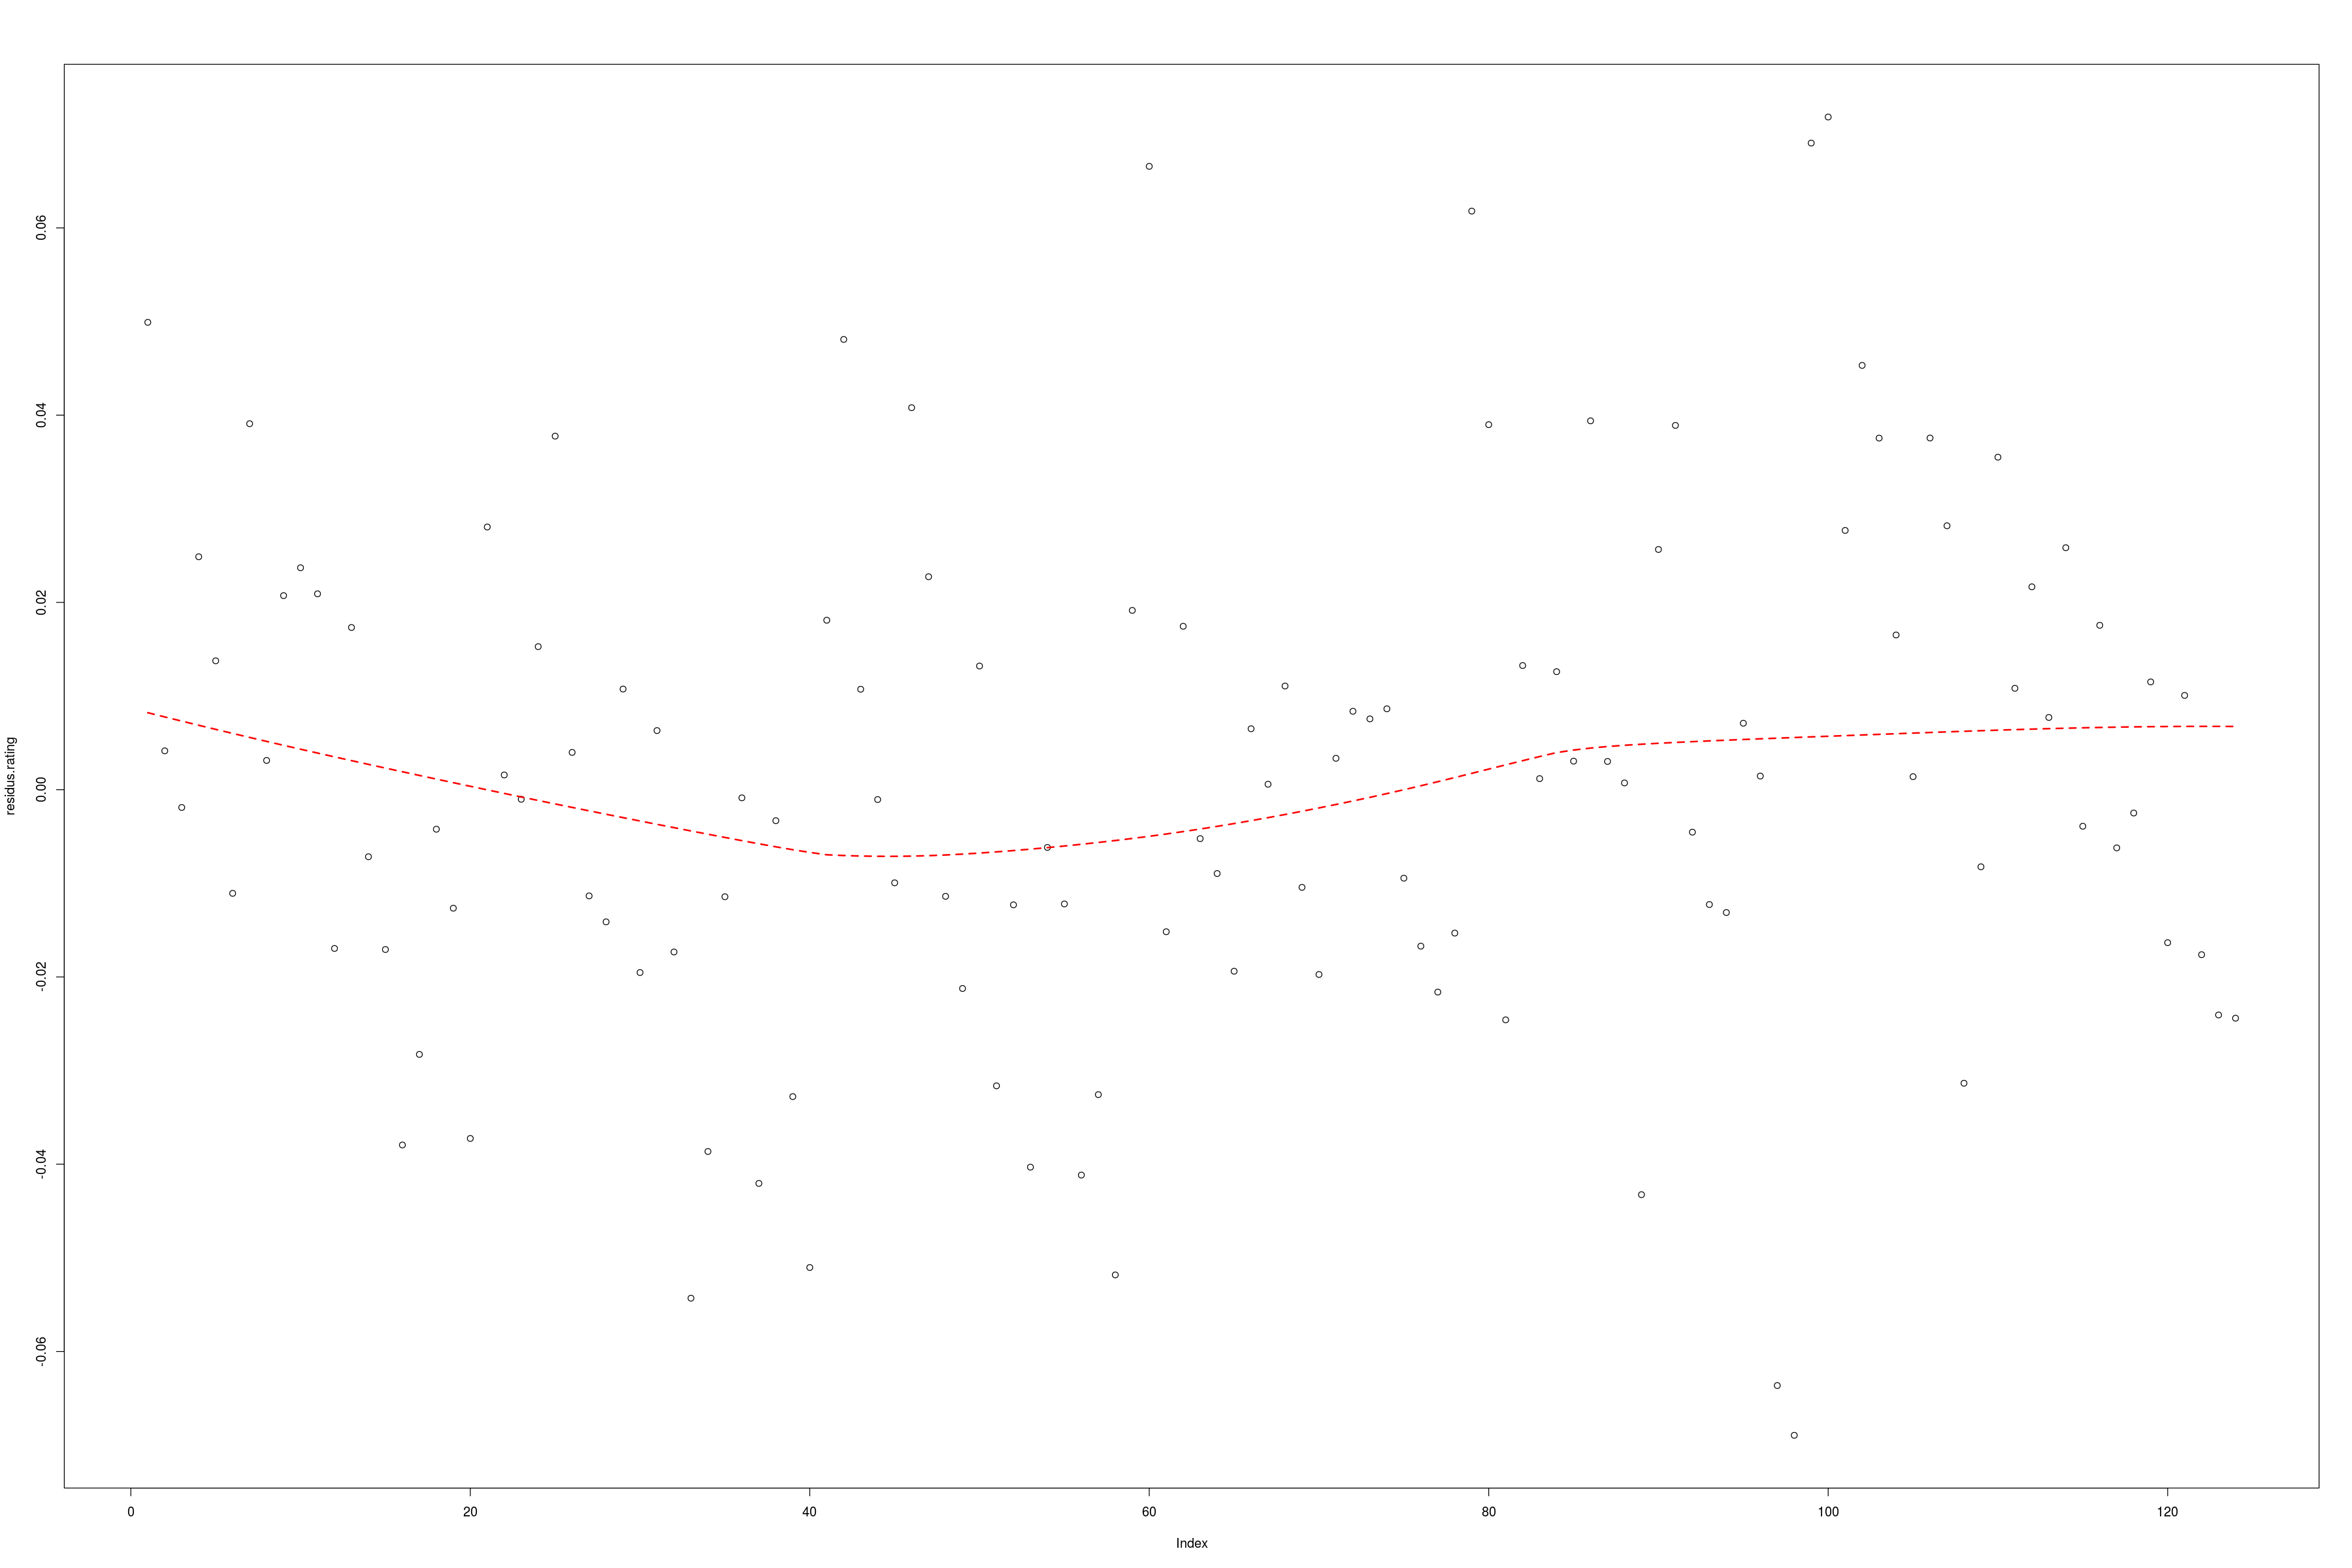

In [19]:
plot(residus.rating)
lines(lowess(seq(1,length(residus.rating)),residus.rating), col = 2, lty = 2, lwd = 2)

On voit que les résidus sont centrés, ce qui montre que la prédiction par RandomForest est efficace pour la variable `Rating`.

In [61]:
r.squared = 1-sum(residus.rating**2)/(length(data_tot$Rating)*var(data_tot$Rating))

In [62]:
r.squared

[1] 0.9517588

Le $R^2$ est très proche de $1$.

#### Sur le nombre de points

Il faut faire du nettoyage : en faisant de la régression ça marche, on a un $R2$ plutôt pas mal mais il fait de la régression donc on obtient des valeurs prédites non entières. Est-ce que si on récupère la partie entière des predict c'est trop faux ??

A l'inverse, quand on essaie de faire de la classification, où chaque classe = 1 entier, on prédit exactement les bonnes valeurs donc sans doute qu'on a fait du suraprentissage.

In [73]:
predict.points = predict(points.rf, data_but_tot)
#predict.points.integer = as.numeric(as.character(predict.points))
#residus.points = data_tot$Points - predict.points.integer
residus.points = data_tot$Points - predict.points

In [74]:
predict.points

Paris Saint-Germain                    Lyon                   Lille 
               86.73097                74.28827                68.12923 
            Montpellier           Saint-Etienne               Marseille 
               59.85270                59.19113                60.39087 
                   Nice                   Nimes                  Rennes 
               49.80557                54.80337                50.56003 
             Strasbourg                   Reims                  Nantes 
               50.70927                46.53330                49.79010 
                 Angers                Bordeaux                Toulouse 
               44.70740                43.15457                37.45153 
                 Monaco                   Dijon                    Caen 
               41.92483                37.09490                30.85307 
                 Amiens                Guingamp                Juventus 
               33.49007                29.32417                80.31470 
                 Napoli                Atalanta                    Roma 
               78.12780                69.21787                66.44067 
                 Torino                AC Milan                   Inter 
               64.04183                65.13213                65.89273 
                  Lazio               Sampdoria              Fiorentina 
               60.36147                53.39877                51.59440 
                Udinese                 Bologna                Sassuolo 
               43.30177                44.22673                49.15923 
                  Genoa               SPAL 2013                Cagliari 
               44.69937                41.38720                38.28573 
                 Empoli       Parma Calcio 1913               Frosinone 
               42.97867                37.26970                30.41237 
                 Chievo           Bayern Munich  RasenBallsport Leipzig 
               22.26700                80.26807                69.09257 
      Borussia Dortmund        Bayer Leverkusen              Hoffenheim 
               65.41350                61.60523                60.39003 
    Eintracht Frankfurt               Wolfsburg     Borussia M.Gladbach 
               50.99597                51.94677                51.97950 
          Werder Bremen           Hertha Berlin                Mainz 05 
               53.01647                43.68107                45.36947 
    Fortuna Duesseldorf                Augsburg              Schalke 04 
               45.00297                39.54717                36.48483 
               Freiburg           VfB Stuttgart             Hannover 96 
               33.18343                32.65883                25.65560 
              Nuernberg               Barcelona         Atletico Madrid 
               23.91567                84.33777                64.77140 
            Real Madrid                Valencia                 Sevilla 
               70.31013                58.42893                60.58127 
             Villarreal                   Eibar           Real Sociedad 
               57.54300                51.42570                50.01830 
                 Getafe                Espanyol              Celta Vigo 
               48.52823                47.25090                50.57997 
             Real Betis         Athletic Bilbao                 Leganes 
               50.71440                45.21353                42.55133 
       Deportivo Alaves                  Girona                 Levante 
               41.59847                39.61543                43.29360 
              SD Huesca          Rayo Vallecano         Real Valladolid 
               39.46587                36.17443                33.69400 
        Manchester City               Liverpool                 Chelsea 
               89.53397                87.35887                76.65037 
              Tottenham                 Arsenal          Cryst

In [75]:
data_tot$Points

[1] 91 75 72 66 61 59 56 55 53 52 49 48 46 41 38 38 36 34 33 27 90 79 69 69 68
 [26] 66 63 59 53 44 43 43 42 41 41 41 38 38 25 17 78 76 66 58 55 55 54 53 51 44
 [51] 43 43 36 33 32 28 21 19 87 76 68 61 59 59 53 53 50 50 50 47 45 44 44 41 41
 [76] 37 33 32 98 97 72 71 70 66 57 54 52 52 50 49 45 45 40 39 36 34 26 16 57 53
[101] 51 45 42 40 38 36 36 35 34 33 33 32 29 29 29 29 26 26 25 24 23 23 23 22

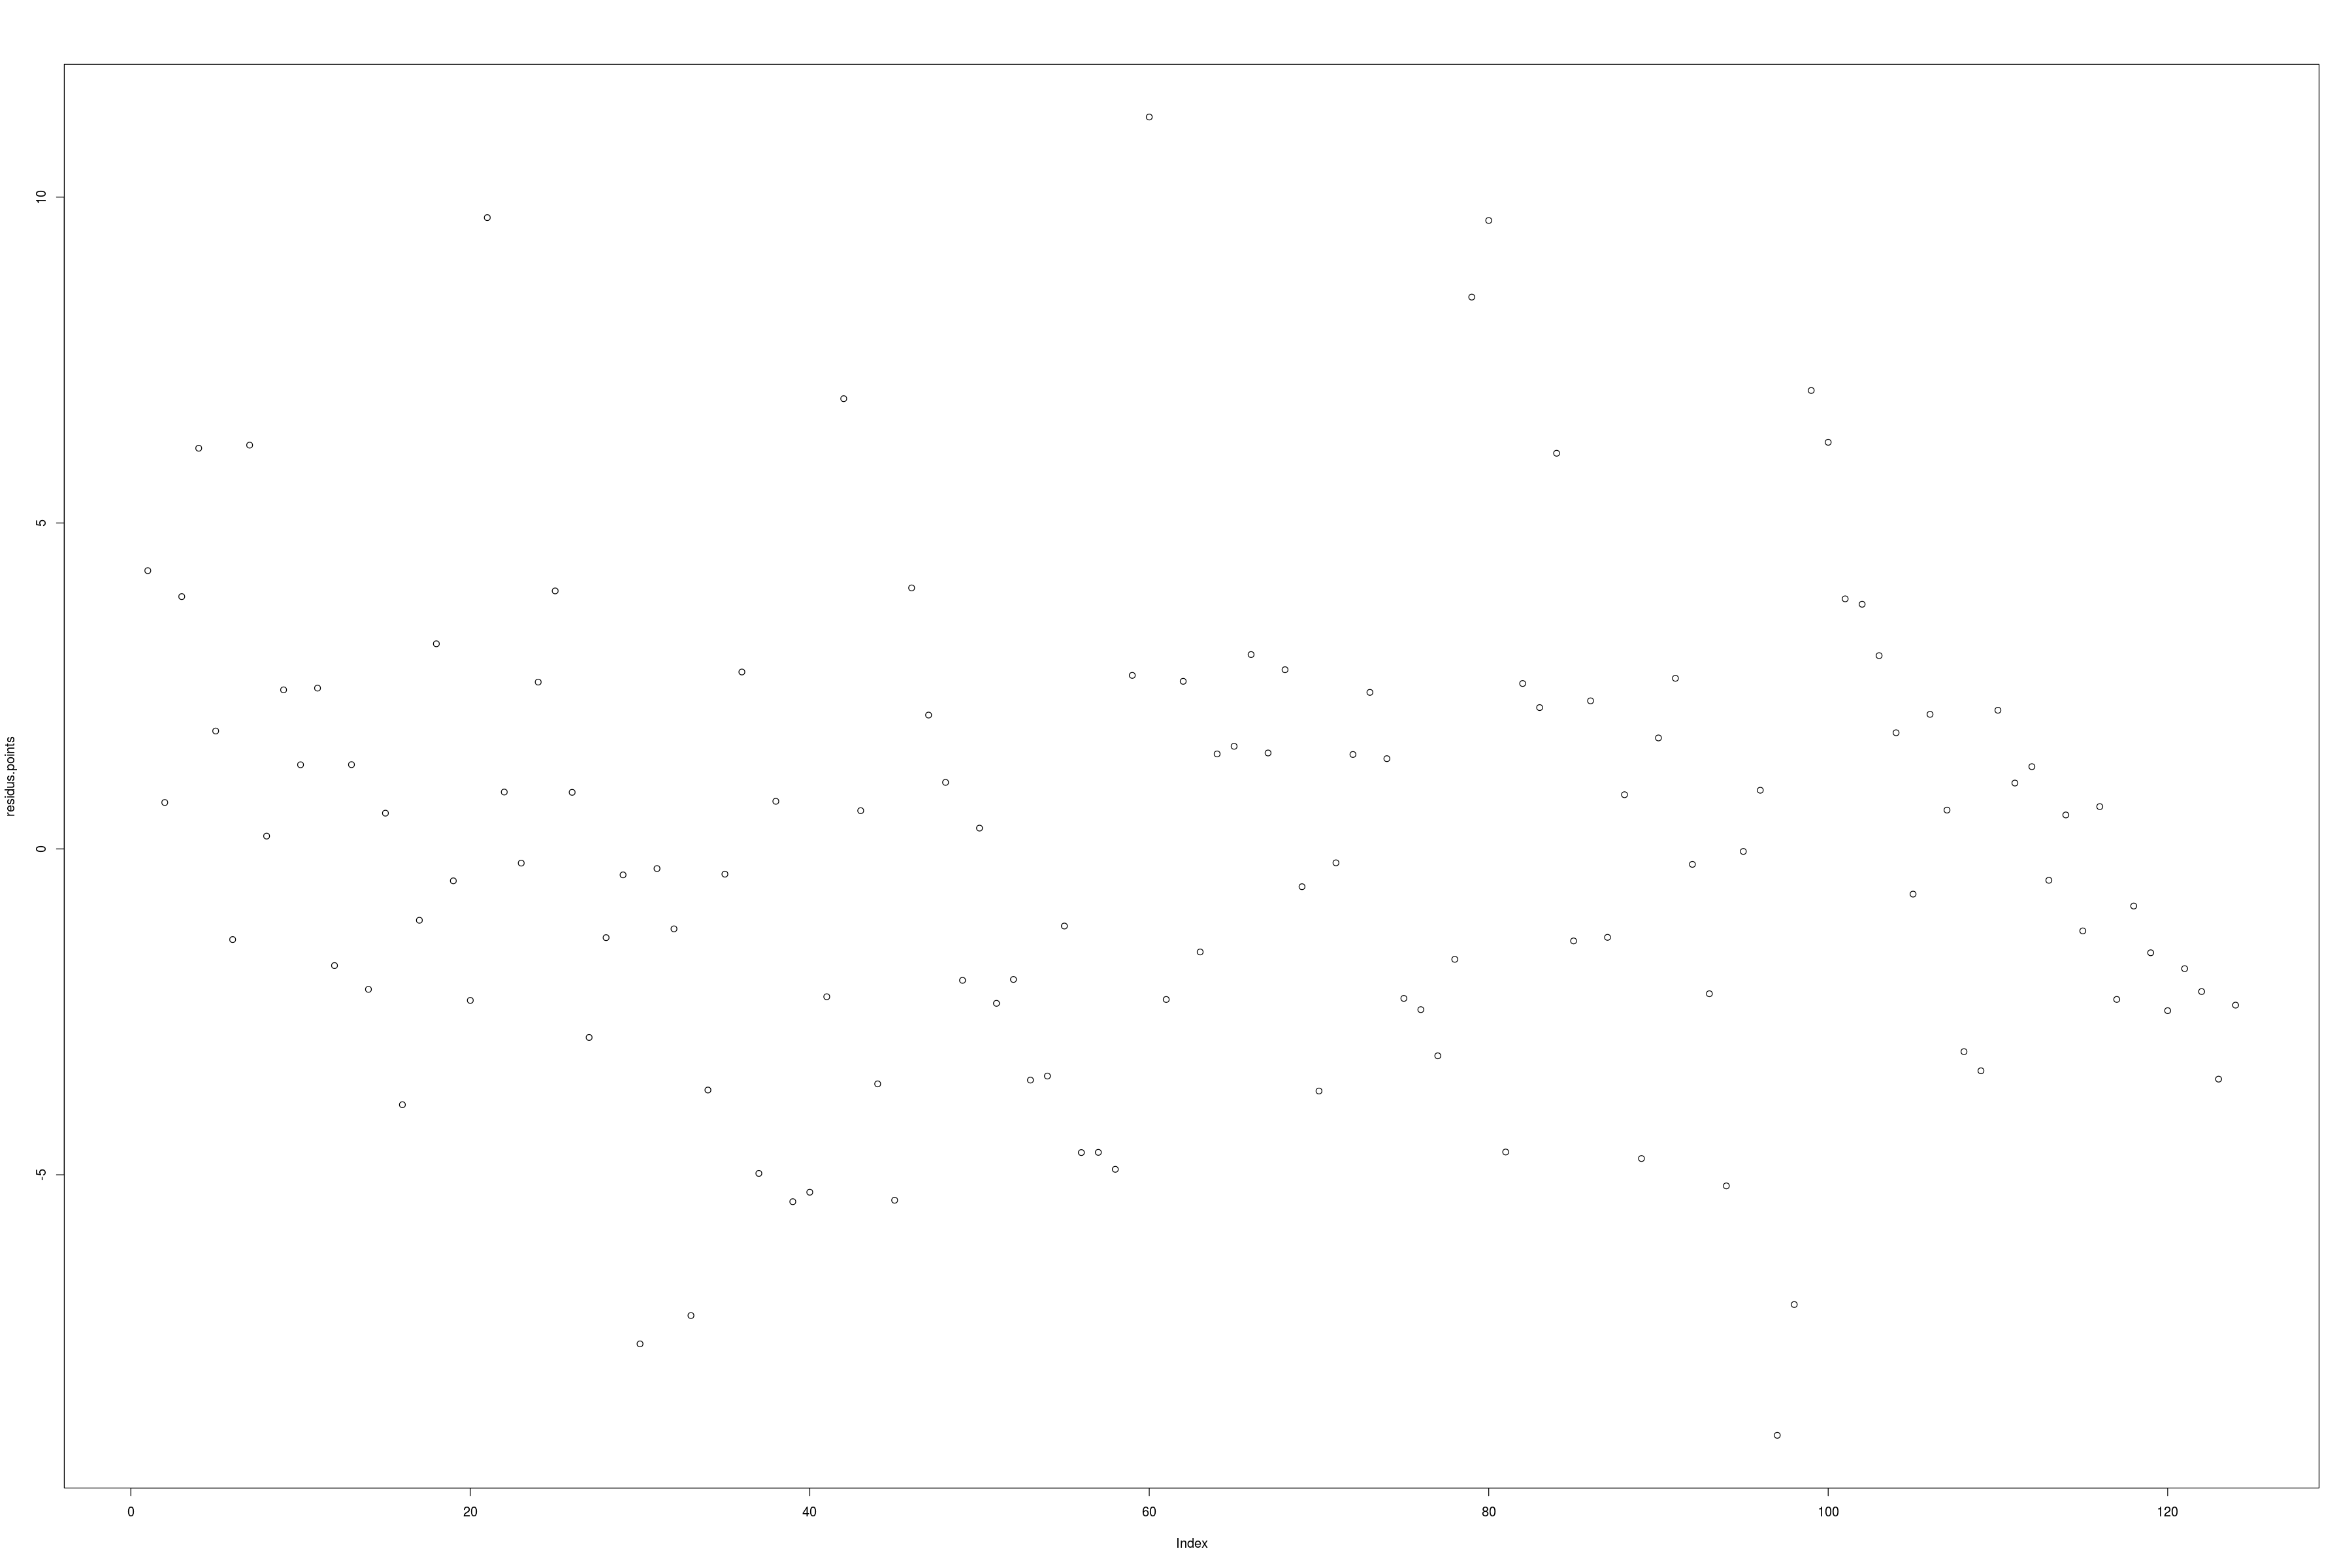

In [76]:
plot(residus.points)
#lines(lowess(seq(1,length(residus.points)),residus.points), col = 2, lty = 2, lwd = 2)

In [79]:
r.squared.points = 1-sum(residus.points**2)/(length(data_tot$Points)*var(data_tot$Points))
r.squared.points

[1] 0.9575

In [27]:
sum(residus.points**2)/124*300

[1] 0

In [33]:
predict.points

Paris Saint-Germain                    Lyon                   Lille 
                     91                      75                      72 
            Montpellier           Saint-Etienne               Marseille 
                     66                      61                      59 
                   Nice                   Nimes                  Rennes 
                     56                      55                      53 
             Strasbourg                   Reims                  Nantes 
                     52                      49                      48 
                 Angers                Bordeaux                Toulouse 
                     46                      41                      38 
                 Monaco                   Dijon                    Caen 
                     38                      36                      34 
                 Amiens                Guingamp                Juventus 
                     33                      27                      90 
                 Napoli                Atalanta                    Roma 
                     79                      69                      69 
                 Torino                AC Milan                   Inter 
                     68                      66                      63 
                  Lazio               Sampdoria              Fiorentina 
                     59                      53                      44 
                Udinese                 Bologna                Sassuolo 
                     43                      43                      42 
                  Genoa               SPAL 2013                Cagliari 
                     41                      41                      41 
                 Empoli       Parma Calcio 1913               Frosinone 
                     38                      38                      25 
                 Chievo           Bayern Munich  RasenBallsport Leipzig 
                     17                      78                      76 
      Borussia Dortmund        Bayer Leverkusen              Hoffenheim 
                     66                      58                      55 
    Eintracht Frankfurt               Wolfsburg     Borussia M.Gladbach 
                     55                      54                      53 
          Werder Bremen           Hertha Berlin                Mainz 05 
                     51                      44                      43 
    Fortuna Duesseldorf                Augsburg              Schalke 04 
                     43                      36                      33 
               Freiburg           VfB Stuttgart             Hannover 96 
                     32                      28                      21 
              Nuernberg               Barcelona         Atletico Madrid 
                     19                      87                      76 
            Real Madrid                Valencia                 Sevilla 
                     68                      61                      59 
             Villarreal                   Eibar           Real Sociedad 
                     59                      53                      53 
                 Getafe                Espanyol              Celta Vigo 
                     50                      50                      50 
             Real Betis         Athletic Bilbao                 Leganes 
                     47                      45                      44 
       Deportivo Alaves                  Girona                 Levante 
                     44                      41                      41 
              SD Huesca          Rayo Vallecano         Real Valladolid 
                     37                      33                      32 
        Manchester City               Liverpool                 Chelsea 
                     98                      97                      72 
              Tottenham                 Arsenal          Cryst

In [34]:
mobforest.analysis(as.formula(data_tot$Points ~ .), data=data_but_tot, colnames(data_but_tot))

ERROR: Error in mobforest.analysis(as.formula(data_tot$Points ~ .), data = data_but_tot, : impossible de trouver la fonction "mobforest.analysis"


In [35]:
points.classe = as.factor(seq(1,100))

In [36]:
points.classe

[1] 1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18 
 [19] 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36 
 [37] 37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54 
 [55] 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72 
 [73] 73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90 
 [91] 91  92  93  94  95  96  97  98  99  100
100 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 100

## SVM

#### Sur la variable Rating

In [44]:
svm.rating = svm(data_tot$Rating ~ ., data=data, kernel="radial")

In [45]:
svm.rating


Call:
svm(formula = data_tot$Rating ~ ., data = data, kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01492537 
    epsilon:  0.1 


Number of Support Vectors:  101


In [50]:
svm.predict.rating = predict(svm.rating, data)

In [52]:
residus.svm.rating = svm.predict.rating - data_tot$Rating

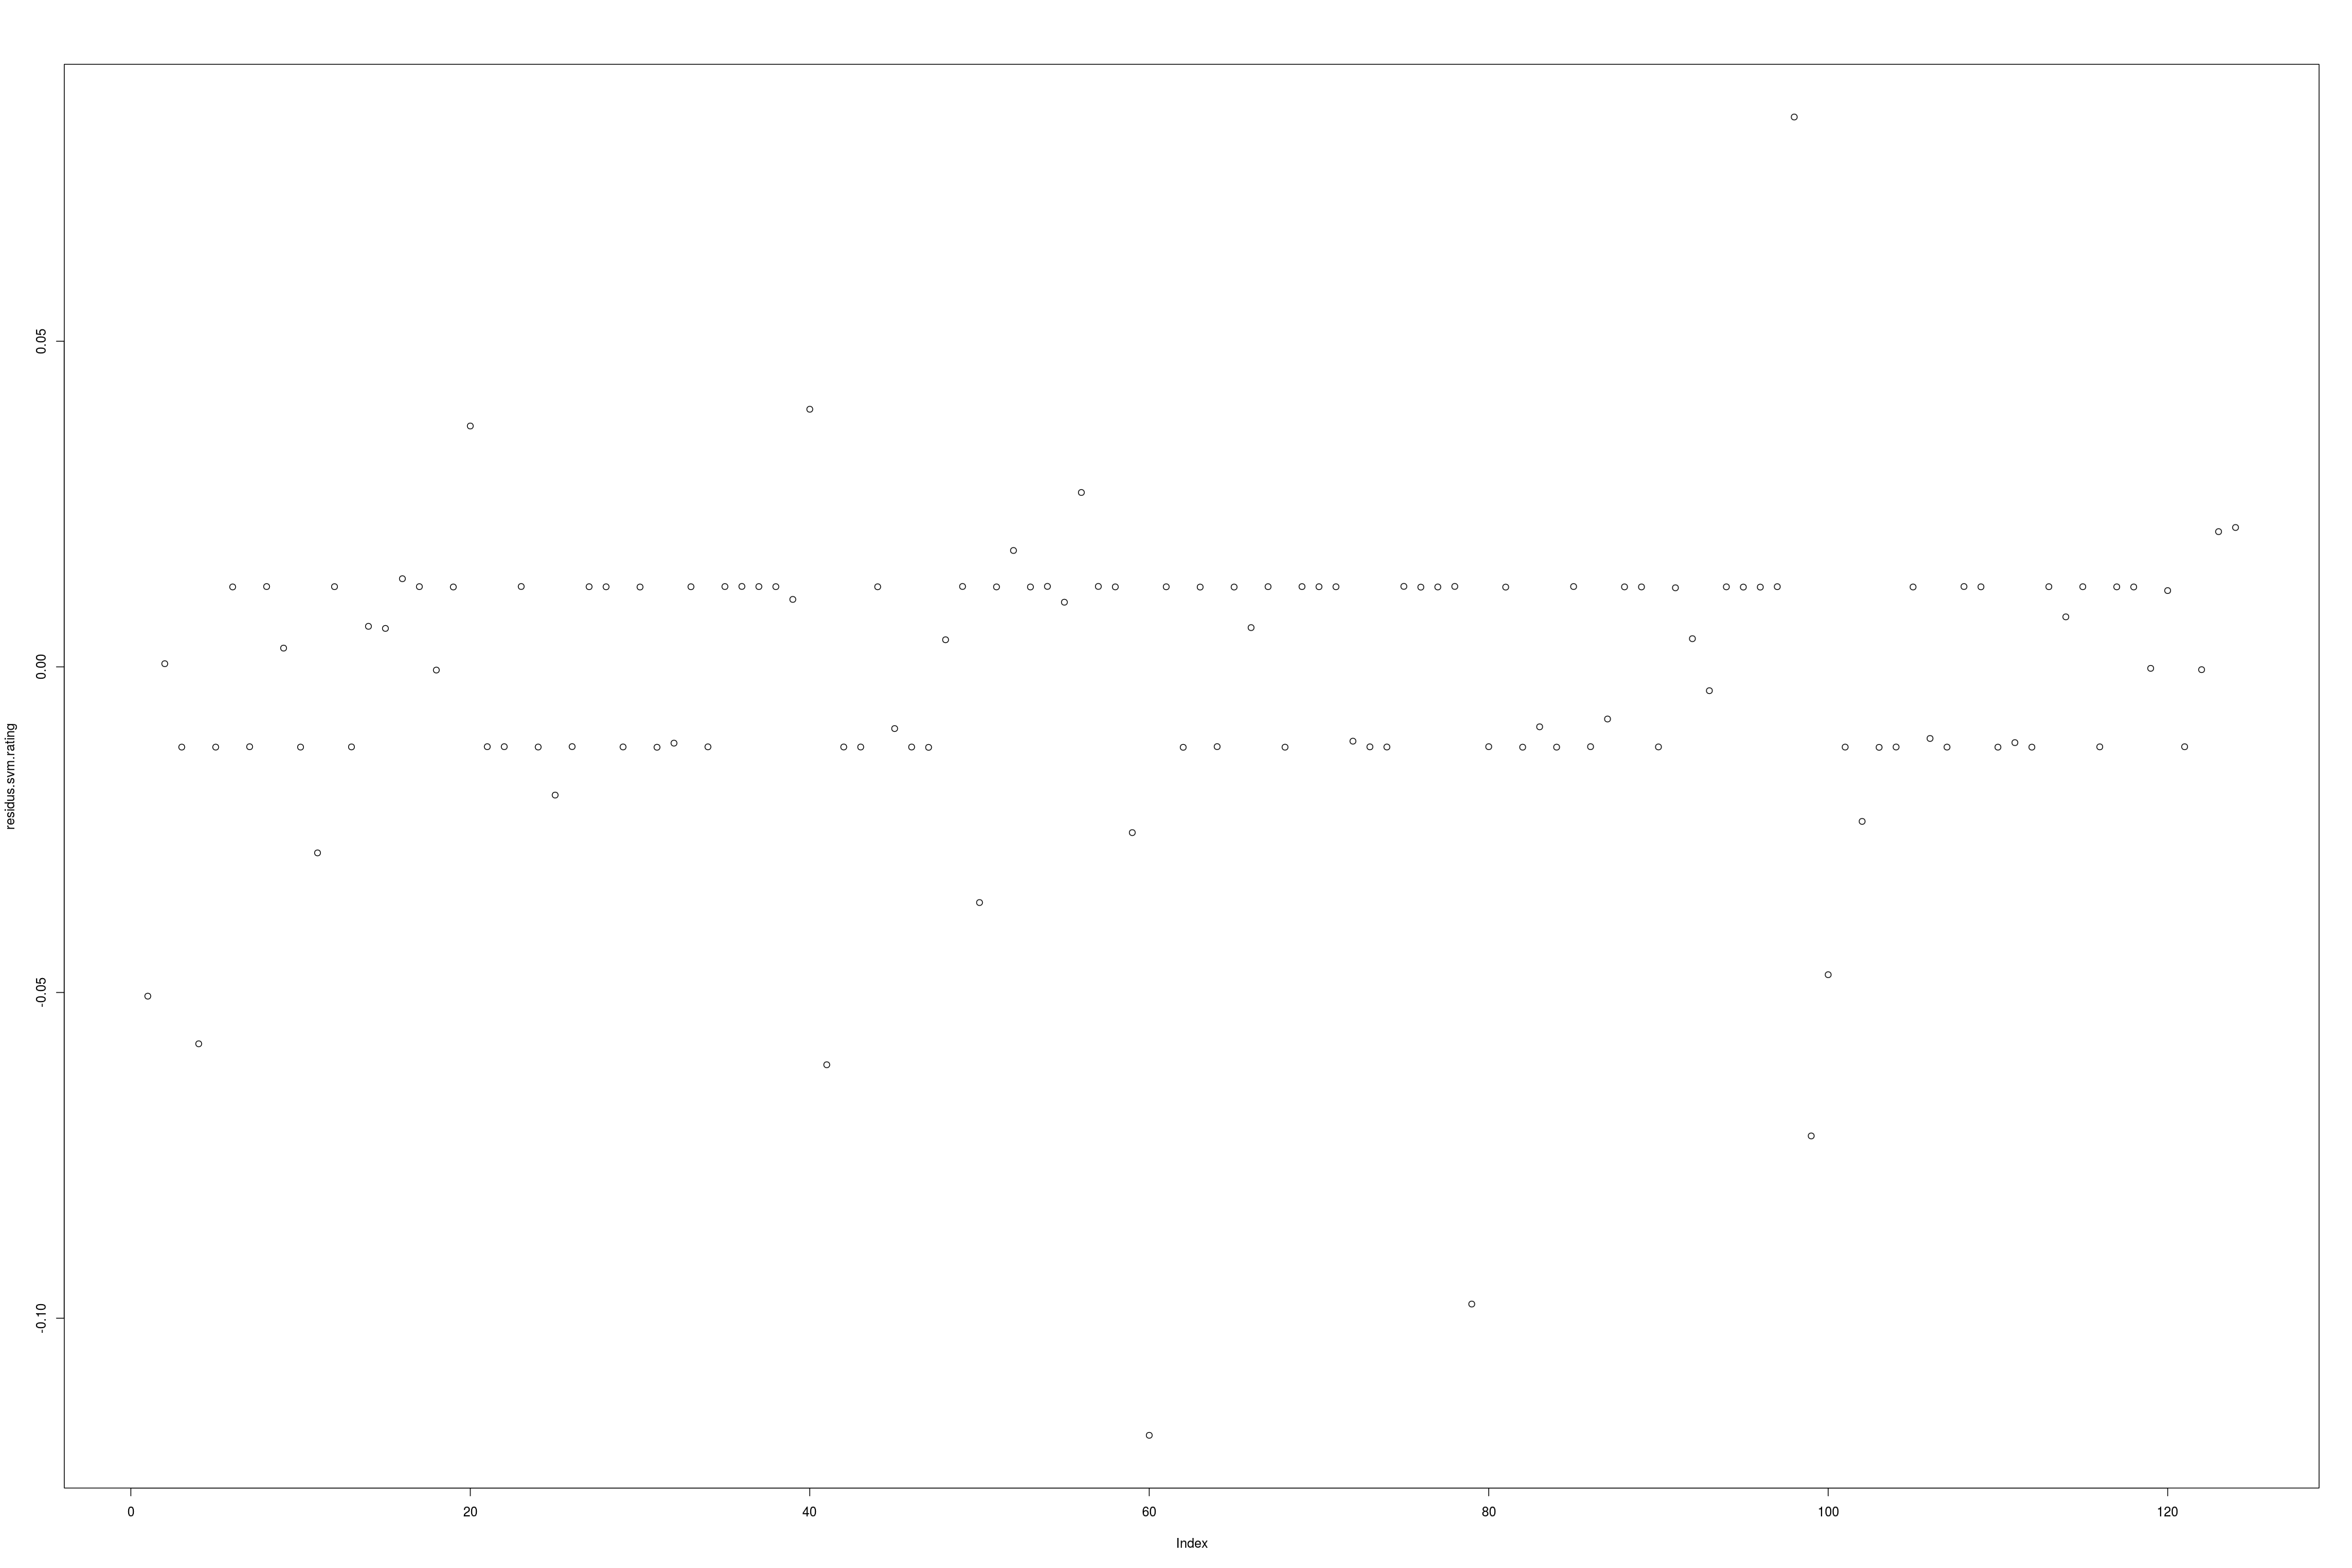

In [53]:
plot(residus.svm.rating)

In [83]:
R2svm.rating = 1 - sum(residus.svm.rating ^ 2)/(length(data_tot$Rating)*var(data_tot$Rating))

In [84]:
print(paste("svm ", R2svm.rating))
print(paste("randomForest", r.squared))

[1] "svm  0.96258369024437"
[1] "randomForest 0.951758821730911"


Le $R2$ obtenu avec la méthode Support Vector Machine est légèrement meilleur que celui obtenu avec RandomForest. On remarque également que les résidus sont moins dispersés. Ceci dit, on voit 2 lignes apparaître dans le graphique des résidus.

#### Sur la variable Points

In [80]:
svm.points = svm(data_tot$Points ~ ., data=data_but_tot, kernel="radial")

In [81]:
svm.predict.points = predict(svm.points, data_but_tot)

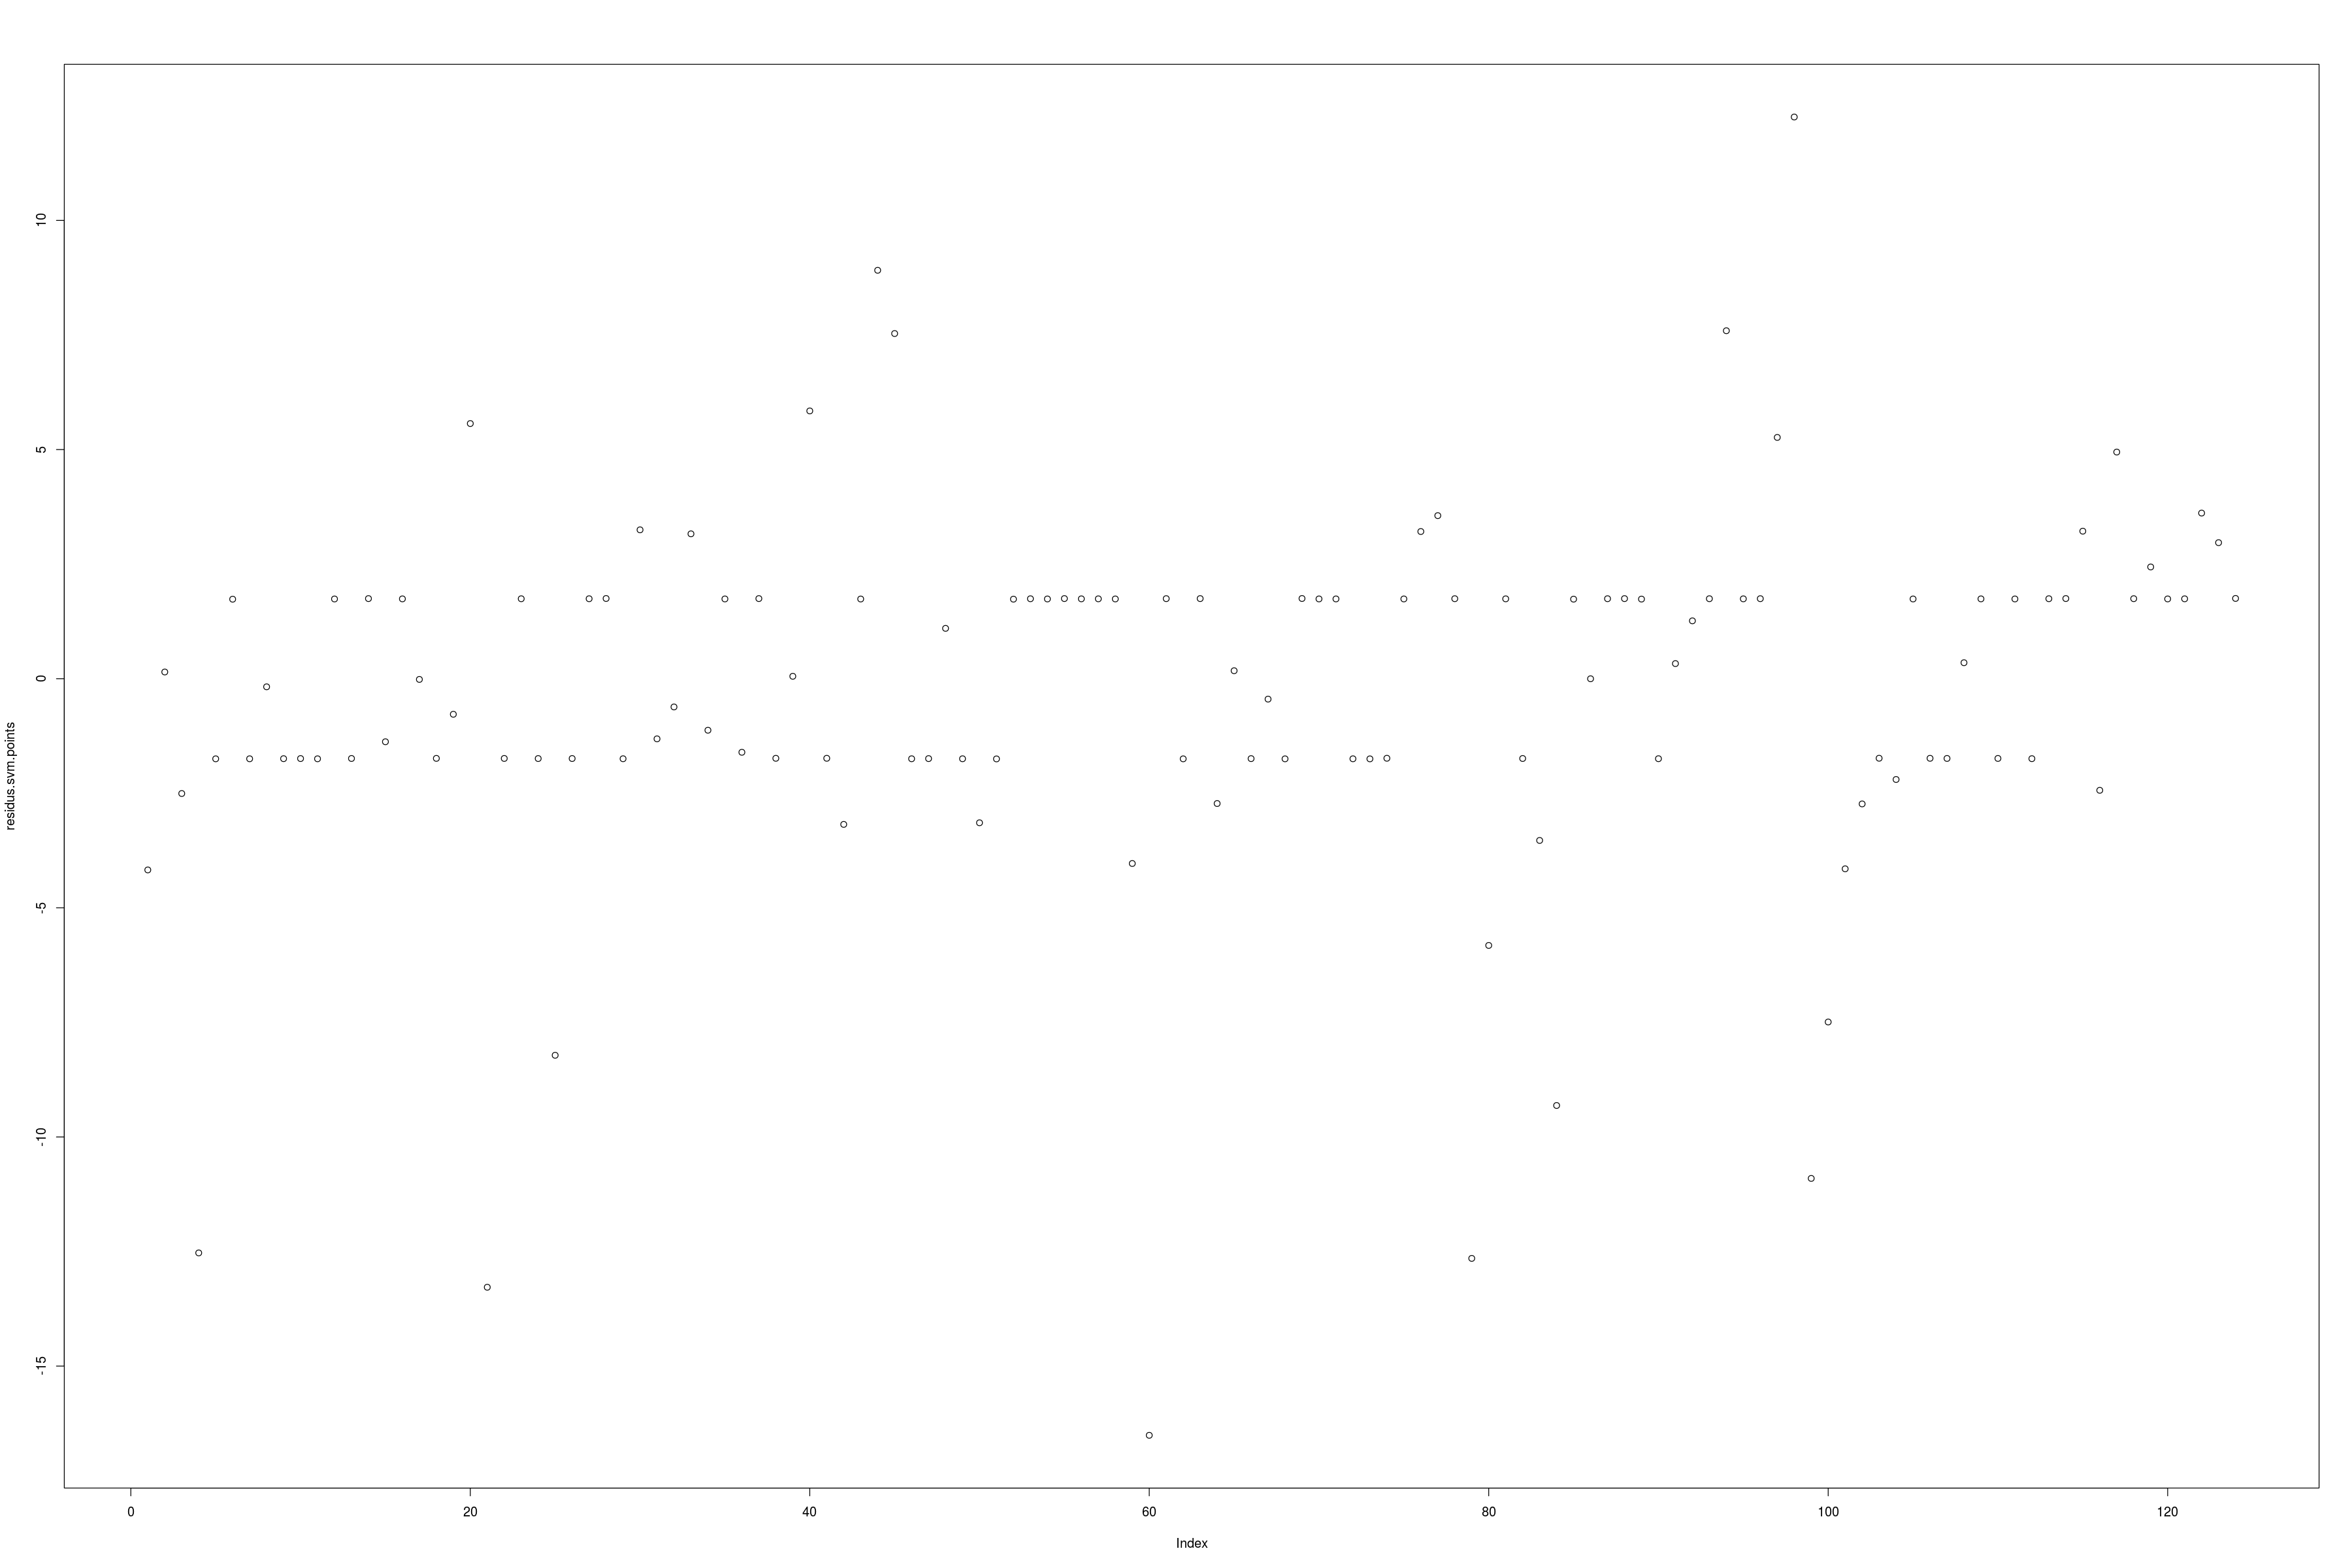

In [82]:
residus.svm.points = svm.predict.points - data_tot$Points
plot(residus.svm.points)

In [85]:
R2svm.points = 1 - sum(residus.svm.points ^ 2)/(length(data_tot$Points)*var(data_tot$Points))

In [86]:
R2svm.points

[1] 0.9465063

Ici on a dégradé un peu le R2.